In [107]:
#will need to pip install fbprophet, dfply

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import datetime
from fbprophet import Prophet
import dfply
from dfply import *

In [4]:
os.chdir('C:/Users/vinhn/Downloads')

In [5]:
df = pd.read_csv('C:/Users/vinhn/Desktop/metro-bike-share-trip-data.csv')

C:\Users\vinhn\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df['Datetime'] = df['Start Time']

In [7]:
df.head()

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long,Datetime
0,1912818,180,2016-07-07T04:17:00,2016-07-07T04:20:00,3014.0,34.056610,-118.23721,3014.0,34.056610,-118.23721,6281.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.23721', 'latitude': '34.05...",2016-07-07T04:17:00
1,1919661,1980,2016-07-07T06:00:00,2016-07-07T06:33:00,3014.0,34.056610,-118.23721,3014.0,34.056610,-118.23721,6281.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.23721', 'latitude': '34.05...",2016-07-07T06:00:00
2,1933383,300,2016-07-07T10:32:00,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,3016.0,34.052898,-118.24156,5861.0,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24156', 'latitude': '34.05...","{'longitude': '-118.24156', 'latitude': '34.05...",2016-07-07T10:32:00
3,1944197,10860,2016-07-07T10:37:00,2016-07-07T13:38:00,3016.0,34.052898,-118.24156,3016.0,34.052898,-118.24156,5861.0,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24156', 'latitude': '34.05...","{'longitude': '-118.24156', 'latitude': '34.05...",2016-07-07T10:37:00
4,1940317,420,2016-07-07T12:51:00,2016-07-07T12:58:00,3032.0,34.049889,-118.25588,3032.0,34.049889,-118.25588,6674.0,0.0,Round Trip,Walk-up,"{'longitude': '-118.25588', 'latitude': '34.04...","{'longitude': '-118.25588', 'latitude': '34.04...",2016-07-07T12:51:00


In [8]:
df['Datetime'] = pd.to_datetime(df.Datetime, format = '%Y-%m-%d %H:%M:%S')
df['Day'] =  df.Datetime.dt.day
df['Month'] =  df.Datetime.dt.month
df['Year'] =  df.Datetime.dt.year

In [9]:
df.head()

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long,Datetime,Day,Month,Year
0,1912818,180,2016-07-07T04:17:00,2016-07-07T04:20:00,3014.0,34.056610,-118.23721,3014.0,34.056610,-118.23721,6281.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.23721', 'latitude': '34.05...",2016-07-07 04:17:00,7,7,2016
1,1919661,1980,2016-07-07T06:00:00,2016-07-07T06:33:00,3014.0,34.056610,-118.23721,3014.0,34.056610,-118.23721,6281.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.23721', 'latitude': '34.05...",2016-07-07 06:00:00,7,7,2016
2,1933383,300,2016-07-07T10:32:00,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,3016.0,34.052898,-118.24156,5861.0,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24156', 'latitude': '34.05...","{'longitude': '-118.24156', 'latitude': '34.05...",2016-07-07 10:32:00,7,7,2016
3,1944197,10860,2016-07-07T10:37:00,2016-07-07T13:38:00,3016.0,34.052898,-118.24156,3016.0,34.052898,-118.24156,5861.0,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24156', 'latitude': '34.05...","{'longitude': '-118.24156', 'latitude': '34.05...",2016-07-07 10:37:00,7,7,2016
4,1940317,420,2016-07-07T12:51:00,2016-07-07T12:58:00,3032.0,34.049889,-118.25588,3032.0,34.049889,-118.25588,6674.0,0.0,Round Trip,Walk-up,"{'longitude': '-118.25588', 'latitude': '34.04...","{'longitude': '-118.25588', 'latitude': '34.04...",2016-07-07 12:51:00,7,7,2016


In [29]:
from datetime import datetime
df['Date'] = df.apply(lambda row: datetime(
                              row['Year'], row['Month'], row['Day']), axis=1)

In [30]:
df.tail()

,TripID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,...,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long,Datetime,Day,Month,Year,Date
132422,23660993,540,2017-03-31T23:43:00,2017-03-31T23:52:00,3055.0,34.044159,-118.251579,3035.0,34.048401,-118.260948,...,0.0,One Way,Walk-up,NaN,"{'longitude': '-118.260948', 'latitude': '34.0...",2017-03-31 23:43:00,31,3,2017,2017-03-31
132423,23660992,480,2017-03-31T23:44:00,2017-03-31T23:52:00,3055.0,34.044159,-118.251579,3035.0,34.048401,-118.260948,...,0.0,One Way,Walk-up,NaN,"{'longitude': '-118.260948', 'latitude': '34.0...",2017-03-31 23:44:00,31,3,2017,2017-03-31
132424,23660991,480,2017-03-31T23:44:00,2017-03-31T23:52:00,3082.0,34.046520,-118.237411,3054.0,34.039219,-118.236488,...,0.0,One Way,Walk-up,NaN,"{'longitude': '-118.236488', 'latitude': '34.0...",2017-03-31 23:44:00,31,3,2017,2017-03-31
132425,23660990,420,2017-03-31T23:45:00,2017-03-31T23:52:00,3082.0,34.046520,-118.237411,3054.0,34.039219,-118.236488,...,0.0,One Way,Walk-up,NaN,"{'longitude': '-118.236488', 'latitude': '34.0...",2017-03-31 23:45:00,31,3,2017,2017-03-31
132426,23664826,1260,2017-03-31T23:45:00,2017-04-01T00:06:00,3078.0,34.064281,-118.238937,3029.0,34.048851,-118.246422,...,0.0,One Way,Walk-up,NaN,"{'longitude': '-118.246422', 'latitude': '34.0...",2017-03-31 23:45:00,31,3,2017,2017-03-31


In [12]:
df.columns.values[0]='TripID'

In [31]:
train = df>>group_by(X.Date)>>summarize(count = n(X.TripID))

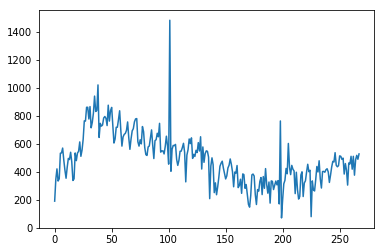

In [32]:
train['count'].plot()
plt.show()

In [89]:
train.count()

ds    268
y     268
dtype: int64

In [34]:
train['Datetime'] = train.Date
train.index = train.Datetime
train.drop(['Date'], axis =1, inplace = True)

In [35]:
train.head()

,count,Datetime
Datetime,,
2016-07-07,190,2016-07-07
2016-07-08,345,2016-07-08
2016-07-09,421,2016-07-09
2016-07-10,334,2016-07-10
2016-07-11,350,2016-07-11


In [37]:
train.head()

,count,Datetime
Datetime,,
2016-07-07,190,2016-07-07
2016-07-08,345,2016-07-08
2016-07-09,421,2016-07-09
2016-07-10,334,2016-07-10
2016-07-11,350,2016-07-11


In [24]:
train.drop(['count'], axis = 1 , inplace = True)

In [50]:
list(train)

['y', 'ds']

In [81]:
train.columns.values[0]='y'
train.columns.values[1]='ds'
train = train.reset_index(drop=True)
train.new = train.y
train.drop(['y'], axis = 1, inplace= True)
train.columns.values[1]='y'

In [82]:
train.head()

,ds,y
0,2016-07-07,190
1,2016-07-08,345
2,2016-07-09,421
3,2016-07-10,334
4,2016-07-11,350


In [116]:
m = Prophet(yearly_seasonality = True, seasonality_prior_scale = 0.15, changepoint_prior_scale=0.1)
m.fit(train)
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\vinhn\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


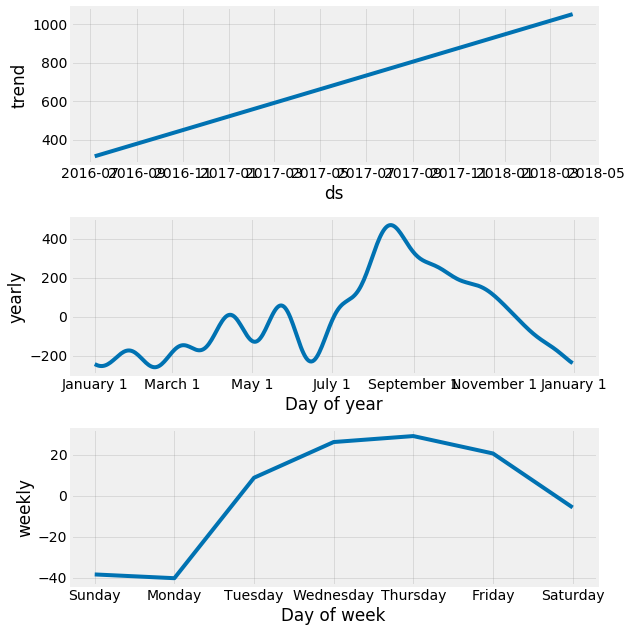

In [117]:
m.plot_components(forecast)

In [118]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
628,2018-03-27,899.407348,777.096630,1027.752331
629,2018-03-28,925.069474,802.345345,1060.420287
630,2018-03-29,937.495986,809.881575,1073.541975
631,2018-03-30,939.692356,813.051870,1068.264310
632,2018-03-31,925.080965,787.367369,1048.889519


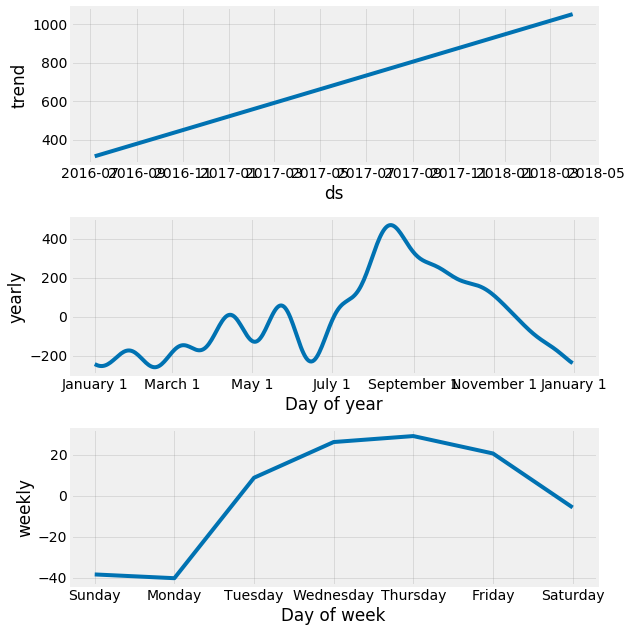

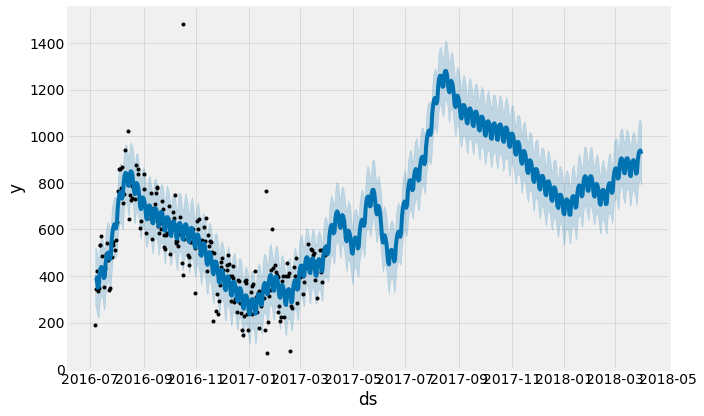

In [119]:
fig1 = m.plot(forecast)
plt.show()

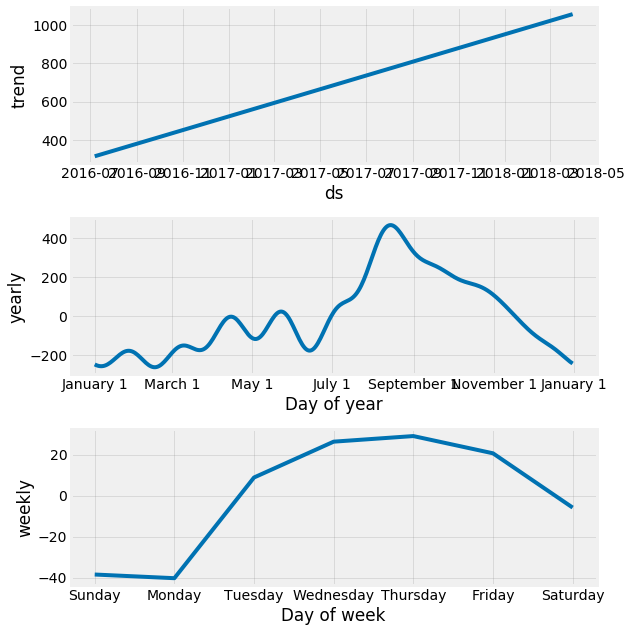

In [108]:
fig2 = m.plot_components(forecast)
plt.show()